In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:

df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df = df.drop_duplicates()

NameError: ignored

In [ ]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [ ]:
#checking for outliers in age and estimatedsalary columns
q3= df.Age.quantile(0.75)
q1= df.Age.quantile(0.25)
iqr = q3-q1
lower_threshold = q1-1.5*iqr
upper_threshold = q3+1.5*iqr
print("upper_threshold--",upper_threshold)
print("lower_threshold--",lower_threshold)
print("max--",df.Age.max())
print("min--",df.Age.min())

upper_threshold-- 70.375
lower_threshold-- 5.375
max-- 60
min-- 18


In [ ]:
q3= df.EstimatedSalary.quantile(0.75)
q1= df.EstimatedSalary.quantile(0.25)
iqr = q3-q1
lower_threshold = q1-1.5*iqr
upper_threshold = q3+1.5*iqr
print("upper_threshold--",upper_threshold)
print("lower_threshold--",lower_threshold)
print("max--",df.EstimatedSalary.max())
print("min--",df.EstimatedSalary.min())


upper_threshold-- 155500.0
lower_threshold-- -24500.0
max-- 150000
min-- 15000


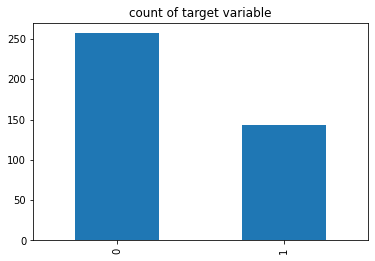

In [ ]:
count = df.Purchased.value_counts()
count.plot(kind='bar', title="count of target variable")

In [ ]:
#dropping user id
df.drop(["User ID"],axis=1,inplace = True)

**Splitting the dataset into the Training set and Test set**

In [ ]:
X= df[['Gender', 'Age', 'EstimatedSalary']].values
y= df["Purchased"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier(max_depth = 6)
# dt.fit(X_train, y_train)
# y_pred = dt.predict(X_test)

reducing the overfit in model by tuning max_depth(hyper=parameter)

In [ ]:
from sklearn.model_selection import cross_val_score
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
  print("Depth  : ", depth,  " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Cross val score :  0.8285714285714286
Depth  :  2  Cross val score :  0.9035714285714287
Depth  :  3  Cross val score :  0.8785714285714284
Depth  :  4  Cross val score :  0.8535714285714284
Depth  :  5  Cross val score :  0.85
Depth  :  6  Cross val score :  0.8607142857142858
Depth  :  7  Cross val score :  0.85
Depth  :  8  Cross val score :  0.8428571428571429
Depth  :  9  Cross val score :  0.8428571428571429
Depth  :  10  Cross val score :  0.8285714285714285
Depth  :  20  Cross val score :  0.8357142857142856


In [ ]:
#best max depth is 2
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

**Predicting the Test set results**

In [ ]:
y_pred = dt.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
115,1,1
116,0,0
117,1,1
118,0,0


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[69,  7],
       [ 2, 42]])

In [ ]:
#f1 score
f1_score(y_test,y_pred)

0.9032258064516128

In [ ]:
#accuracy
accuracy_score(y_test,y_pred)


0.925

In [ ]:
#auroc score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.93122009569378

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.474\ngini = 0.457\nsamples = 280\nvalue = [181, 99]'),
 Text(0.25, 0.5, 'X[2] <= 0.617\ngini = 0.265\nsamples = 197\nvalue = [166, 31]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.069\nsamples = 167\nvalue = [161, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.278\nsamples = 30\nvalue = [5, 25]'),
 Text(0.75, 0.5, 'X[2] <= -0.892\ngini = 0.296\nsamples = 83\nvalue = [15, 68]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.064\nsamples = 30\nvalue = [1, 29]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.389\nsamples = 53\nvalue = [14, 39]')]

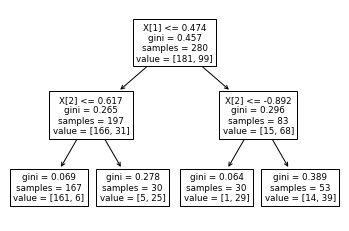

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


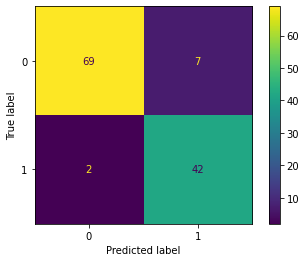

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()